# CS 237 Lab 2 Reading: Python List Comprehensions and The Numpy Library

This notebook contains a brief overview of list comprehensions and the main features of the numpy library, which we will use for many of the programming projects in this course. You have probably seen list comprehensions at some point, as they are an essential part of Python programming culture. They are actually very easy to understand will enable you to write very complicated algorithms quite simply, in a few lines of code. Numpy is probably less familiar to you; the basic things to know about the numpy library are

- It is based on arrays (or "vectors") instead of lists so that it is more efficient than the normal Python list data structure; these arrays can be multi-dimensional, although we will pretty much stick to 1D arrays, which will look almost identical to ordinary Python lists.
- It contains a wide variety of functions for scientific and mathematical computing, and the fact that these functions operate on arrays means they are much more efficient than the usual functions on Python lists.
- Numpy functions can work on individual data points OR on entire lists, which means that most list manipulations can be specified very succinctly and compactly; you don't need to create and modify lists element by element!

### This next cell contains various imports and settings, don't touch unless you know what you are doing!

In [1]:
# CS 237: Lab 2
#@Author: Kai Bernardini
# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

# General useful imports
import numpy as np
from numpy import arange,linspace
import matplotlib.pyplot as plt  
from numpy.random import seed, randint, uniform, choice, shuffle
from collections import Counter
import pandas as pd
%matplotlib inline

## <font color='red'>NOTE: Don't just read this through passively -- run each cell (control-return) to see how it behaves!
</font>

# List Comprehensions in Python
Python's primary data structure, lists, provide a very compact way of organizing algorithms that collect together lots of data that need to be processed in a similar way. We will do that quite often in CS 237, and you should carefully consider the powerful technique of list comprehensions as an essential component of your Python toolkit.

The fundamental idea is that instead of building up a list element by element with a for loop, you can simply specify the structure of the list using one or more sfor loop and boolean conditions. Once you get used to doing things this way, you will never want to go back to writing for loops. List comprehensions are also more efficient! 

## Basic example of a list comprehension

Here is probably how you would create a list of squares in the range 0 .. 10 if you translate your Java thinking into Python:

In [2]:
# Creating a list of squares of the numbers from 0 to 10 using a for loop

# Here's one way:

X = [0]*11           # create a list of 11 zeros

for k in range(11):
    X[k] = k**2
    
print(X)

# Here's another:

Y = []

for k in range(11):
    Y.append( k** 2 )
    
print(Y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


Here is how you can do this in one line using a list comprehension:

In [3]:
Z = [ k**2 for k in range(11) ]
print(Z)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


The basic syntax should be easy to see: you give an expression along with the first line of a for loop, and it constructs the whole list at once (at least, from your point of view). Here are some more examples:

In [4]:
print( [ (k,k**2) for k in range(11) ] )

[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81), (10, 100)]


In [5]:
print( [ c + c for c in ['a', 'b', 'c'] ] )

['aa', 'bb', 'cc']


In [6]:
print( [ c + c for c in 'CS237' ] )

['CC', 'SS', '22', '33', '77']


## Multiple for loops
You can also use multiple for loops, which would then replace nested for loops

In [7]:
# Clunky old way to do it, if you are stuck in the Java mindset:

A = []
for r in range(5):
    for c in range(3):
       A.append( (r,c) ) 
    
print(A)

# Using snazzy new Python thinking:

print(  [ (r,c) for r in range(5) for c in range(3) ] )    # note there is no comma between the two for expressions

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2)]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2)]


## Adding boolean conditions
You can also add boolean expressions to filter the values you want to use to construct your list

In [8]:
# Clunky old way to do it, if you are stuck in the Java mindset:

Even = []
for x in range(20):
    if(x%2 == 0):
       Even.append( x ) 
    
print(Even)

# Using snazzy new Python thinking:

print(  [ x for x in range(20) if x % 2 == 0 ] )    # again, no comma between for an if expressions

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


And you can mix for and if expressions:

In [9]:
print(  [ (x,y) for x in range(5) if(x%2 == 0) for y in range(5) if(y%2 ==1)] )

[(0, 1), (0, 3), (2, 1), (2, 3), (4, 1), (4, 3)]


When you combine list comprehensions with ordinary list functions, or with numpy functions, you can do all kinds of complicated things very simply. Here are a couple of nice examples.

In [10]:
# Here is a nice example of this technique: removing vowels from a word:

word = 'mathematics'

X = [ c for c in word if not c in ['a','e','e','o','u']]

word2 = ''.join(X)

print(word2)


mthmtics


In [11]:
# Counting how many numbers in range [1..10000] are divisible by 17
# Should be the same as floor(10000/17)

a = [ 1 for n in range(1,10000) if n % 17 == 0 ]
print( sum(a) )

588


In [12]:
# Generating a list of random floats in range [0..1]

print( [np.random.random() for i in range(20) ] )

[0.5003714747617946, 0.44144700138925863, 0.027321275785590182, 0.18777286139551808, 0.9555742034187417, 0.006195201543716333, 0.6217040231554197, 0.3998900833715464, 0.08785049802346778, 0.1198794124700604, 0.7613830750225563, 0.9461153761681698, 0.6628201961321638, 0.9549214094498077, 0.8606344402197017, 0.6681865545003739, 0.9303666063682142, 0.20321289634231743, 0.3835126254478096, 0.8490877635154772]


In [13]:
# Simulating the rolling of two dice; list is the outcomes of rolling two dice 10 times

print(  [np.random.randint(1,7)+np.random.randint(1,7) for i in range(20)] )

[3, 7, 10, 9, 8, 11, 7, 10, 10, 9, 5, 5, 8, 12, 7, 6, 9, 5, 2, 8]


# The Numpy Library

In [14]:
# The standard abbreviation for numpy is given in the import statement:
import numpy as np

# The basic data structure: Numpy arrays

- Numpy arrays can be multi-dimensional or (as usual in this case) 1 dimensional
- They can be created a number of ways, and when you print them out, they will look almost the same as normal Python lists (or, nested lists, in the case of multi-dimensional arrays)

## Creating Numpy Arrays 
- You can create an empty array filled with 0's or give it a Python list to convert to an array
- print(...) will display these just the same as Python lists

In [15]:
# Creating an empty 1D array filled with 0's
X = np.zeros([5])            # you put the length of the array in braces, you'll see why in the next section
print("Here is what print(...) will display (default is floating point values):")
print(X)
print("\nBut here is what the function actually returned:")
X

Here is what print(...) will display (default is floating point values):
[ 0.  0.  0.  0.  0.]

But here is what the function actually returned:


array([ 0.,  0.,  0.,  0.,  0.])

In [16]:
# Creating an empty 2D array filled with 0's
X = np.zeros([5,4])                              # [5,4] means an array with 5 rows and 4 columns          
print("Here is what print(...) will display, as a list of lists:")
print(X)
print("\nBut here is what the function actually returned:")
X

Here is what print(...) will display, as a list of lists:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

But here is what the function actually returned:


array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [17]:
# Creating an array from a Python list
X = np.array([2,3,4,5,6])                      # Think of this as a constructor          
print(X)

[2 3 4 5 6]


In [18]:
# Creating a 2D array from a Python list of lists
X = np.array([[2,3,4],[1,2,3]])                      # Think of this as a constructor          
print(X)

[[2 3 4]
 [1 2 3]]


## Numpy Versions of the Python range function: arange and linspace
Numpy provides two useful functions for creating ranges of floating-point values

In [19]:
from numpy import arange,linspace

# arange(low,high,increment) is the floating point equivalent of the Python range function:

print( arange(1,10,0.5) )

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.
  8.5  9.   9.5]


In [20]:
print( arange(0,1,0.03) )

[ 0.    0.03  0.06  0.09  0.12  0.15  0.18  0.21  0.24  0.27  0.3   0.33
  0.36  0.39  0.42  0.45  0.48  0.51  0.54  0.57  0.6   0.63  0.66  0.69
  0.72  0.75  0.78  0.81  0.84  0.87  0.9   0.93  0.96  0.99]


In [21]:
# linspace(low,high,num) provides a useful alternative, in which num values are spaced equally over [low..high]
# The array returned will have num floats and include the endpoint of the range:

print( linspace(1,10,6) )

[  1.    2.8   4.6   6.4   8.2  10. ]


In [22]:
print( linspace(0,1,10))

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]


In [23]:
# If you want to exclude the endpoint, you will get something more similar to what is returned by arange:
print( linspace(0,1,10,endpoint=False))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]


## Creating Random Arrays using the Numpy random library
- Numpy has a variety of functions which can create random values, as if from the output of a random experiment
- The most useful discrete functions are randint(...), choice(....), and shuffle(....)
- The most useful continuous functions (for now) are random(....) and uniform(...)
- These functions can create an entire array of random values all at once, i.e., the entire list of output from multiple trials of a random experiment
- See https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html for the complete set of such functions

In [24]:
# Here is the import statement, which will let you simply call these without the "np." prefix:
from numpy.random import randint, random, uniform, choice, shuffle

## randint

In [25]:
# randint(low,high) returns a single random integer in the range [low .. high)
print( randint(1,7) )

# Run this cell multiple times by typing control-return and see the value change

3


In [26]:
# randint(low,high,[length]) returns a 1D array of the given length, filled with random integer values [low .. high)
# alternately, you can set the size parameter, which assumes the array is 1D

print( randint(1,7,[10]) )
print( randint(1,7,size=10) )

# Run this cell multiple times by typing control-return and see the values change

[4 1 6 1 6 2 2 1 4 1]
[5 4 6 4 6 4 2 2 1 6]


In [27]:
# You can also create 2D arrays:
print( randint(1,7,[10,5]) )

# Run this cell multiple times by typing control-return and see the values change

[[6 2 4 6 3]
 [5 2 6 4 3]
 [4 2 5 4 4]
 [6 2 4 5 5]
 [1 1 4 1 2]
 [6 4 4 5 5]
 [3 6 5 5 2]
 [5 4 1 2 5]
 [5 3 3 2 6]
 [3 2 4 6 6]]


## choice

In [28]:
# choice( list ) returns a random element from the list, chosen equi-probably
print( choice([2,5,7]))

7


In [29]:
# Or, of course, you can return a list of such values; the choices are made "with replacement" as if choosing cards
# from a deck, but after each choice, you put the card back, so that you can choose the same element again:
print( choice([2,5,7],[20]))
print( choice([2,5,7],size=20))        # this is another way to do it

[2 7 2 2 7 2 2 7 5 2 7 7 2 2 5 5 2 2 5 2]
[7 2 5 2 2 5 7 7 5 5 5 5 7 2 7 2 5 7 7 7]


In [30]:
# This is one of the few functions that can manipulate random lists of non-numeric data:
print( choice(['H','T'],[10]))

['T' 'H' 'T' 'H' 'T' 'H' 'H' 'H' 'T' 'H']


In [31]:
# If you want to make the choice non-equiprobable, you can list the probability function for the list:
print( choice([2,5,7],p=[0.5,0.1,0.4]))

2


In [32]:
# If you want to make the choice without replacement, as in dealing cards, when you can't choose the same card twice:
print( choice([1,2,3,4,5],[3],replace=False) )

[4 1 5]


## shuffle

In [33]:
# shuffle( list ) modifies the list in-place by shuffling its contents -- like shuffling a pack of cards!
X = [1,2,3,4,5]
print(X)
shuffle(X)
print(X)

[1, 2, 3, 4, 5]
[4, 3, 5, 2, 1]


In [34]:
X = ['a', 'b', 'c', 'd']
print(X)
shuffle(X)
print(X)

['a', 'b', 'c', 'd']
['d', 'a', 'b', 'c']


## random

In [35]:
# random() returns a single random float in the range [0..1)
print( random() )

0.798219909145149


In [36]:
# random([length]) returns an array of random values of the given length
print( random(size=5) )

[ 0.60243327  0.29946146  0.63173777  0.05599351  0.53997251]


## uniform

In [37]:
# uniform(low,high) returns a random float in range [low..high), chosen equiprobably:
print( uniform(3.14,5) )

4.567121322064692


In [38]:
# creating a random array in a given interval:
print( uniform(0,0.1, [10]) )

[ 0.05551349  0.05416124  0.02078735  0.07888795  0.02162473  0.04298986
  0.02795184  0.07029143  0.02920001  0.05223106]


# Arithmetic Operations and Functions on Numpy Arrays
Numpy provides the usual functions that return useful information about the contents of an array:

In [39]:
A = np.array([1,2,3,4,5])
print(A)
print('Sum of elements in A:  ' + str( A.sum() ) )

print('Minimum of elements in A:  ' + str( A.min() ) )

print('Maximum of elements in A:  ' + str( A.max() ) )


[1 2 3 4 5]
Sum of elements in A:  15
Minimum of elements in A:  1
Maximum of elements in A:  5


But, one of the very cool things about the numpy library is that is allows you to do arithmetic on arrays element by element, and also apply functions to a list as a whole:

In [40]:
# Numpy functions apply element by element to an entire array:
X = np.array([1,2,3,4,5])
print( np.sqrt(X) )

[ 1.          1.41421356  1.73205081  2.          2.23606798]


[ 0.          0.12822827  0.25645654  0.38468481  0.51291309  0.64114136
  0.76936963  0.8975979   1.02582617  1.15405444  1.28228272  1.41051099
  1.53873926  1.66696753  1.7951958   1.92342407  2.05165235  2.17988062
  2.30810889  2.43633716  2.56456543  2.6927937   2.82102197  2.94925025
  3.07747852  3.20570679  3.33393506  3.46216333  3.5903916   3.71861988
  3.84684815  3.97507642  4.10330469  4.23153296  4.35976123  4.48798951
  4.61621778  4.74444605  4.87267432  5.00090259  5.12913086  5.25735913
  5.38558741  5.51381568  5.64204395  5.77027222  5.89850049  6.02672876
  6.15495704  6.28318531]


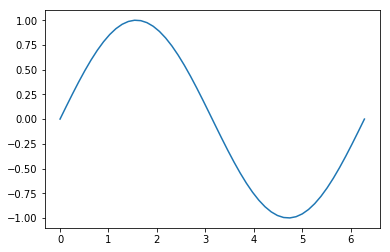

In [41]:
# displaying a sin wave using np.sin:

from matplotlib import pyplot as plt
%matplotlib inline

X = linspace(0,2*np.pi,50)        # Generate 100 evenly space points around the unit circle
print(X)
Y = np.sin(X)                      # Generate the corresponding Y values all at once in an array Y
plt.plot(X,Y)


In [42]:
# Adding two arrays element by element
X = np.array([1,2,3,4])
print(X)
Y = np.array([2,3,4,5])
print(Y)
Z = X + Y
print(Z)

[1 2 3 4]
[2 3 4 5]
[3 5 7 9]


In [43]:
# Works for most arithmetic operations:
A = X * Y
print(A)

[ 2  6 12 20]


In [44]:
A = X / Y
print(A)

[ 0.5         0.66666667  0.75        0.8       ]


In [45]:
# The special assignment operations work as well
X += 1
print(X)

[2 3 4 5]


In [46]:
X += Y
print(X)

[ 4  6  8 10]


In [47]:
# So you can now do various idioms such as accumulation using arrays:
X = randint(1,7,[5,4])
print(X)

[[2 1 4 6]
 [2 1 6 5]
 [4 1 2 5]
 [3 5 5 4]
 [1 1 3 5]]


In [48]:
Y = np.zeros([4])
for k in range(len(X)):
    Y += X[k]
print("Sum of each column in X:")
print(Y)

Sum of each column in X:
[ 12.   9.  20.  25.]


## Final Example: Using list comprehensions and numpy arrays to simulate random experiments
Using list comprehensions and numpy together makes it easy to perform random experiments without a lot of messy for loops; here is the solution to Lab 1, Problem 3

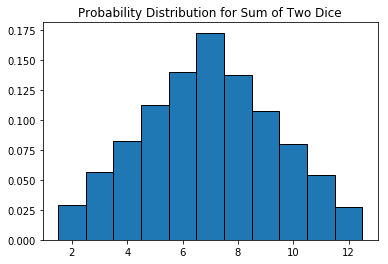

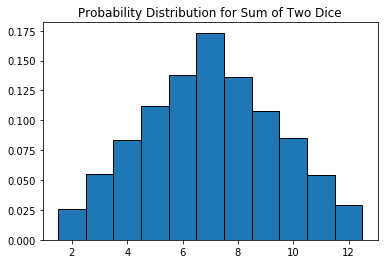

In [49]:
from collections import Counter

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    plt.title(title)
    plt.show()
    
def roll_and_add_dice(n_dice, n_trials = 10000):
    results = randint(1,7,(n_dice, n_trials))      # Each row is has 10,000 trials for 1 dice
                                                   # The columns are n_dice values for each successive trial
    acum =  np.zeros(n_trials)
    for i in range(len(results)):
        acum += results[i]                         # Add the columns to get result of rolls n_dice dice
    return acum
    

show_distribution(roll_and_add_dice(2),title='Probability Distribution for Sum of Two Dice')

# Here's another way to do it, showing the power of list comprehensions with numpy! A one-line solution!

def roll_and_add_dice2(n_dice, n_trials = 10000):
    return [ sum(randint(1,7,[n_dice])) for k in range(n_trials) ]

show_distribution(roll_and_add_dice2(2),title='Probability Distribution for Sum of Two Dice')


## For further information....
For the most part, you can get good advice from StackOverflow or the documentation on numpy if you just Google "numpy <function>". For a somewhat more extensive tutoral on numpy, here is a good place to start: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html